# TP1 IIA 2024

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Funciones de generación

## Diagonales

Generar n datos con d inputs:

  - n/2 pertenecientes a la categoría 0. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (-1, -1, -1, ... , -1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).
  - n/2 pertenecientes a la categoría 1. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (1, 1, 1, ... ,1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).


In [2]:
def covM(d, C):
  return np.identity(d)*([(C*np.sqrt(d))**2]*d)

def diagonales(n, d, C):
  n0 = int(n/2)
  #Clase0
  c0 = [np.append(x, 0) for x in np.random.multivariate_normal([-1]*d, covM(d, C), n0)]
  #Clase1
  c1 = [np.append(x, 1) for x in np.random.multivariate_normal([1]*d, covM(d, C), n-n0)]

  flist = c0 + c1
  # Crear DataFrame
  df = pd.DataFrame(flist, columns=[f'dim_{i}' for i in range(d)] + ['class'])
  return df

## Paralelas

Igual al punto anterior, pero las distribuciones tienen centro en el ( 1, 0, 0, .... , 0 ) y en el ( -1, 0, 0, .... , 0 ), respectivamente y la desviación estandar es igual a C independientemente de d.

In [3]:
def covM2(d, C):
  return np.identity(d)*([C**2]*d)

def paralelas(n, d, C):
  n0 = int(n/2)
  #Clase0
  c0 = [np.append(x, 0) for x in np.random.multivariate_normal([-1] + [0]*(d-1), covM2(d, C), n0)]
  #Clase1
  c1 = [np.append(x, 1) for x in np.random.multivariate_normal([1] + [0]*(d-1), covM2(d, C), n-n0)]

  flist = c0 + c1
  # Crear DataFrame
  df = pd.DataFrame(flist, columns=[f'dim_{i}' for i in range(d)] + ['class'])
  return df

## Espirales

Generar n datos. De los n puntos generados, n/2 deben pertenecer a cada clase.

Los datos tienen 2 inputs, x e y, que corresponden a puntos generados al azar con una distribución UNIFORME (en dicho sistema de referencia x-y) dentro de un circulo de radio 1.

El output es binario, correspondiendo la clase 0 a los puntos que se encuentran entre las curvas ro = theta/4pi y ro = (theta + pi)/4pi (en polares) y la clase 1 al resto.

In [4]:
def cartesian_to_polar(x, y):
    rho = (x**2 + y**2)**0.5
    theta = math.atan2(y, x)
    return rho, theta

def is_inside_curve(rho, theta, npi):
  rho_curve1 = (theta + (npi-1)*math.pi) / (4 * math.pi)
  rho_curve2 = (theta + npi*math.pi) / (4 * math.pi)
  return rho_curve1 <= rho <= rho_curve2

def is_inside_curves(x, y):
    rho, theta = cartesian_to_polar(x, y)
    return is_inside_curve(rho, theta, 1) or is_inside_curve(rho, theta, 3) or is_inside_curve(rho, theta, 5)

def espirales(n):
  count0 = 0
  count1 = 0
  l = []
  while (count0 + count1) < n:
    x = np.random.uniform(-1, 1, 1)
    y = np.random.uniform(-1, 1, 1)
    if ((x**2 + y**2)**0.5 < 1): # si esta adentro del circulo
      if (is_inside_curves(x, y)):
        if count0 < int(n/2):
          l.append([x, y, 0])
          count0+=1
      else:
        if count1 < int(n/2):
          l.append([x, y, 1])
          count1+=1
  df = pd.DataFrame(l, columns=['dim_1', 'dim_2', 'class'])
  return df

# Ejercicio 1

## Código

In [ ]:
sizes = [150, 600, 3000]
dataframes_training = [espirales(x) for x in sizes]
dataframe_test = espirales(10000)

<ipython-input-50-d3ff5f2296b3>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta = math.atan2(y, x)


In [ ]:
trees = []
for df in dataframes_training:
  target = df["class"].values.tolist()
  df = df.drop(columns=["class"])
  data = df.to_numpy()
  t = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
  t.fit(data, target)
  trees.append(t)

<ipython-input-53-f8e0b01a114f>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-53-f8e0b01a114f>:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


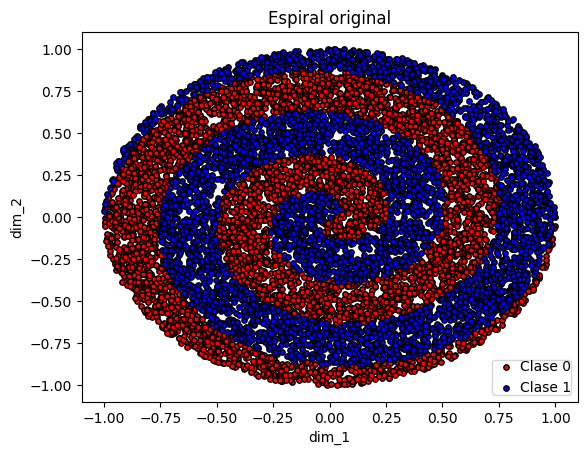

In [ ]:
target = dataframe_test["class"].to_numpy()
feature_names = list(dataframe_test.columns.values)[:-1]
target_names= list(set(dataframe_test["class"].values.tolist()))
dataframe_test_2 = dataframe_test.drop(columns=["class"])
test_data = dataframe_test_2.to_numpy()

idx = np.where(target == 0)
plt.scatter(
    test_data[idx, 0],
    test_data[idx, 1],
    c=['r'],
    label="Clase 0",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=15,
)

idx = np.where(target == 1)
plt.scatter(
    test_data[idx, 0],
    test_data[idx, 1],
    c=['b'],
    label="Clase 1",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=15,
)

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.title(f'Espiral original')
plt.show()

<ipython-input-54-468a78d30039>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-54-468a78d30039>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


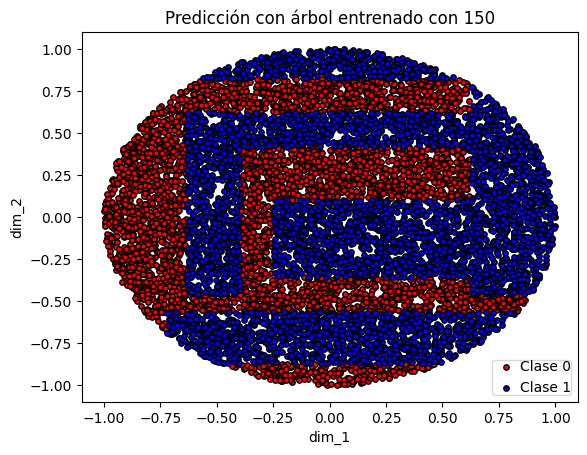

El valor de accuracy obtenido es: 0.6928


<ipython-input-54-468a78d30039>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-54-468a78d30039>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


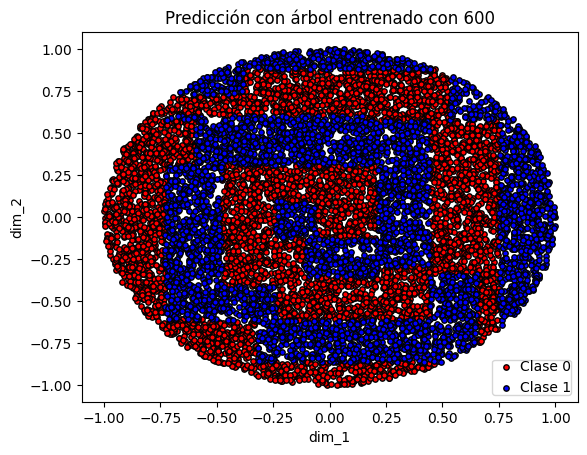

El valor de accuracy obtenido es: 0.8317


<ipython-input-54-468a78d30039>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-54-468a78d30039>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


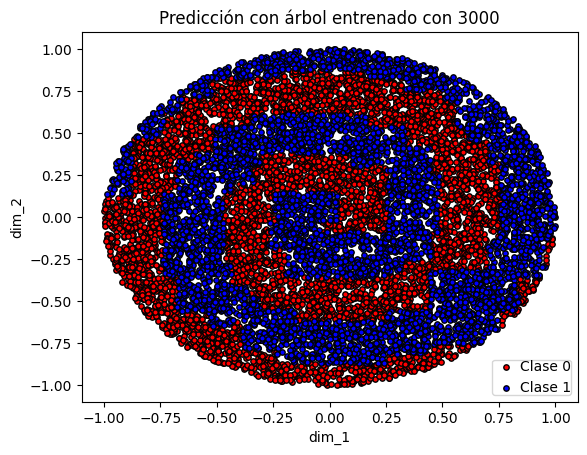

El valor de accuracy obtenido es: 0.9081


In [ ]:
for idt, t in enumerate(trees):
  prediction = t.predict(test_data)
  idx = np.where(prediction == 0)
  plt.scatter(
      test_data[idx, 0],
      test_data[idx, 1],
      c=['r'],
      label="Clase 0",
      cmap=plt.cm.RdYlBu,
      edgecolor="black",
      s=15,
  )

  idx = np.where(prediction == 1)
  plt.scatter(
      test_data[idx, 0],
      test_data[idx, 1],
      c=['b'],
      label="Clase 1",
      cmap=plt.cm.RdYlBu,
      edgecolor="black",
      s=15,
  )

  plt.xlabel(feature_names[0])
  plt.ylabel(feature_names[1])
  plt.legend(loc="lower right", borderpad=0, handletextpad=0)
  plt.title(f'Predicción con árbol entrenado con {sizes[idt]}')
  plt.show()

  accuracy = accuracy_score(target, prediction)

  print("El valor de accuracy obtenido es: {}".format(accuracy))

## Análisis

Podemos ver que mientras mas puntos tiene el conjunto de entrenamiento mejor es la accuracy de cada arbol. Esto se ve reflejado en las graficas de las predicciones, por ejemplo en la prediccion del primer arbol, el que fue entrenado con 150 puntos, la grafica no se parece al espiral original en lo absoluto. En la grafica del segundo arbol se puede notar como empieza a tomar un poco mas de forma el espiral, lo cual tambien se ve reflejado en la mejora considerable del accuracy. Por ultimo, el tercer arbol, el generado con 3000 puntos de entrenamiento, tenemos un accuracy superior al 90%, lo cual es muy facil de ver en la grafica ya que es muy similar a los espirales originales.

En este dataset no notamos sobreajuste, ya que la generacion de los espirales es sin ruido, y al estar los datos bien clasificados en cada zona del espiral, mientras mas puntos utilicemos para entrenar mejor se puede definir cada zona.

# Ejercicio 2

## Diagonal

### Generacion de datos

In [ ]:
C = 0.78
df_test = diagonales(10000, 2, C)
feature_names = list(df_test.columns.values)[:-1]
test_target = df_test["class"].to_numpy()
test_data = df_test.drop(columns=["class"]).to_numpy()

In [ ]:
n_sizes = [125, 250, 500, 1000, 2000, 4000]
tree_counts = 20

errors_diagonales = {}

predictions = {}

for n in n_sizes:
  errors_list = []
  for i in range(tree_counts):
    df_train = diagonales(n, 2, C)
    train_target = df_train["class"].to_numpy()
    train_data = df_train.drop(columns=["class"]).to_numpy()

    t = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
    t.fit(train_data, train_target)

    predict_train = t.predict(train_data)
    accuracy_train = accuracy_score(train_target, predict_train)

    predict_test = t.predict(test_data)
    accuracy_test = accuracy_score(test_target, predict_test)

    if len(errors_list) == 0:
      predictions[n] = predict_test

    errors_list.append({'tree_size': t.tree_.node_count, 'error_train': 1-accuracy_train, 'error_test': 1-accuracy_test})
  errors_diagonales[n] = errors_list

### Gráficas de predicciones

<ipython-input-9-f2a2c5201e6f>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-9-f2a2c5201e6f>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


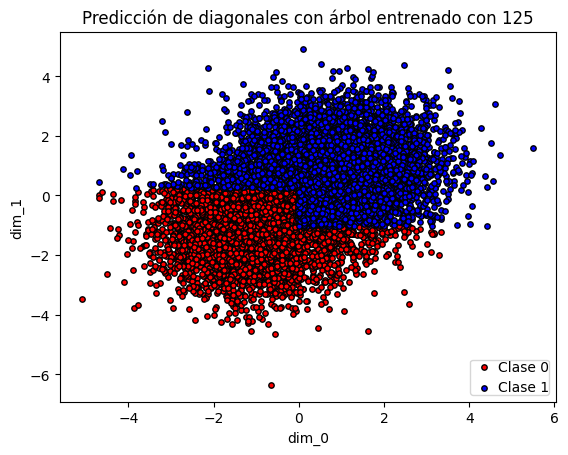

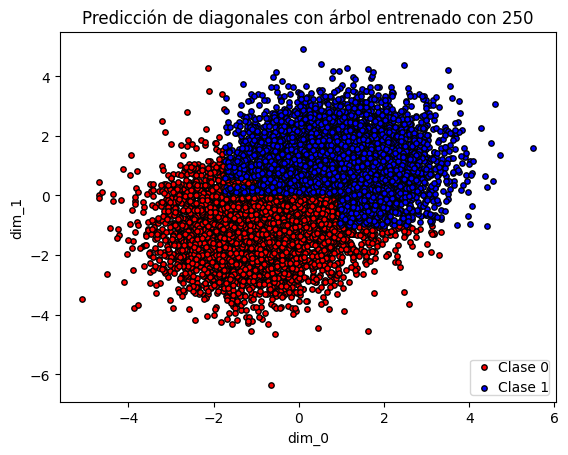

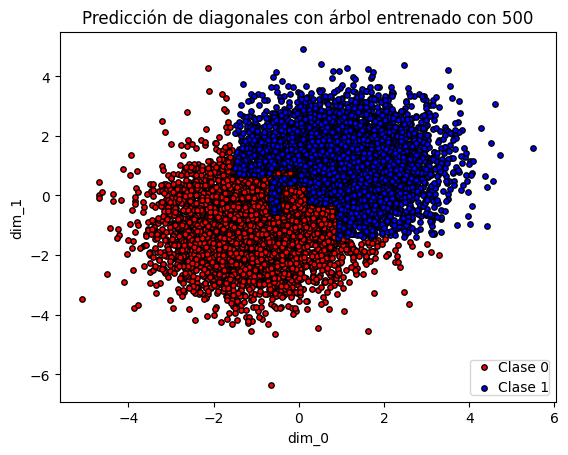

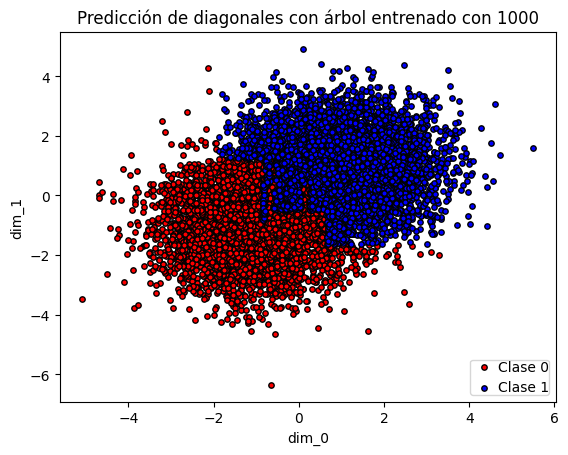

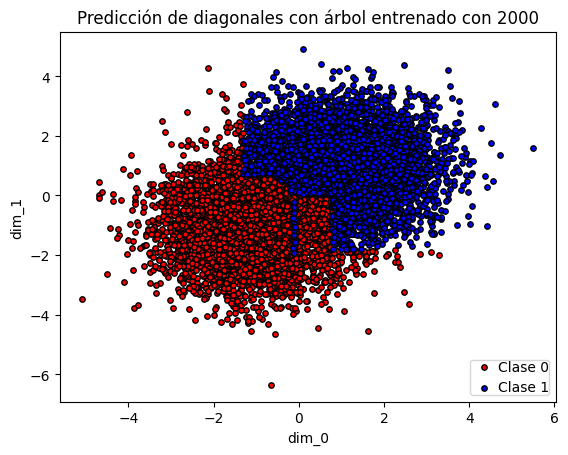

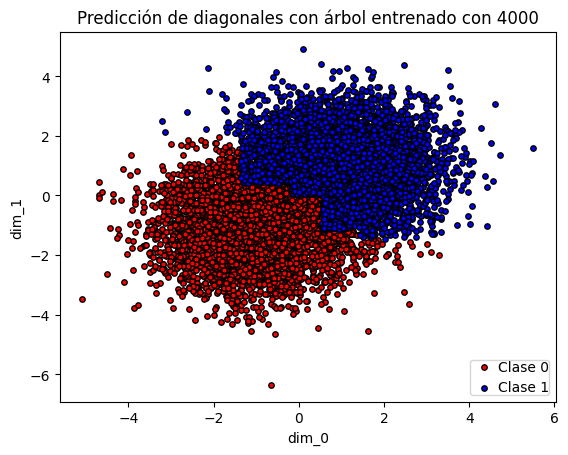

In [ ]:
for k, prediction in predictions.items():
  idx = np.where(prediction == 0)
  plt.scatter(
      test_data[idx, 0],
      test_data[idx, 1],
      c=['r'],
      label="Clase 0",
      cmap=plt.cm.RdYlBu,
      edgecolor="black",
      s=15,
  )

  idx = np.where(prediction == 1)
  plt.scatter(
      test_data[idx, 0],
      test_data[idx, 1],
      c=['b'],
      label="Clase 1",
      cmap=plt.cm.RdYlBu,
      edgecolor="black",
      s=15,
  )

  plt.xlabel(feature_names[0])
  plt.ylabel(feature_names[1])
  plt.legend(loc="lower right", borderpad=0, handletextpad=0)
  plt.title(f'Predicción de diagonales con árbol entrenado con {k}')
  plt.show()

### Análisis de las gráficas

Podemos notar que los arboles entrenados con menos datos generan fronteras de decisiones mucho mas cuadradas, donde no se asemejan para nada a una diagonal. Tambien podemos notar errores donde zonas que estan claramente mas pobladas por puntos de una clase estan siendo clasificados como otra, esto se da debido a que la generacion de los datos de entrenamiento deben haber generado mucho ruido en estas zonas. Esto ultimo es overfitting, ya que se esta adaptando de mas al conjunto de entrenamiento, memorizando en lugar de generalizar.

Mientras mas datos utilizamos para el entrenamiento podemos ver muchos mas vertices en esta frontera y tambien se puede notar como se asemeja cada vez mas a la recta y=-x. Esto es porque todo punto que este por encima de esta recta es mas probable que sea de la clase 1, mientras que si esta por debajo es mas probable que sea de la 0. El error que se ve con menos datos se encuentra mitigado ya que al haber entrenado con mucho mas puntos, los errores van a ser menores que los datos reales generados en un punto por las distribuciones que estamos utilizando.

### Promedios

In [ ]:
diagonales_avgs = {}
for k, data in errors_diagonales.items():
  error_test_sum = 0
  error_training_sum = 0
  tree_size_sum = 0
  for d in data:
    error_test_sum += d['error_test']
    error_training_sum += d['error_train']
    tree_size_sum += d['tree_size']
  diagonales_avgs[k] = {'tree_size': tree_size_sum/len(data), 'error_train': error_training_sum/len(data), 'error_test': error_test_sum/len(data)}

## Paralela

### Generacion de datos

In [ ]:
C = 0.78
df_test = paralelas(10000, 2, C)
feature_names = list(df_test.columns.values)[:-1]
test_target = df_test["class"].to_numpy()
test_data = df_test.drop(columns=["class"]).to_numpy()

In [ ]:
n_sizes = [125, 250, 500, 1000, 2000, 4000]
tree_counts = 20

errors_paralelas = {}

predictions = {}

for n in n_sizes:
  errors_list = []
  for i in range(tree_counts):
    df_train = paralelas(n, 2, C)
    train_target = df_train["class"].to_numpy()
    train_data = df_train.drop(columns=["class"]).to_numpy()

    t = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
    t.fit(train_data, train_target)

    predict_train = t.predict(train_data)
    accuracy_train = accuracy_score(train_target, predict_train)

    predict_test = t.predict(test_data)
    accuracy_test = accuracy_score(test_target, predict_test)

    if len(errors_list) == 0:
      predictions[n] = predict_test

    errors_list.append({'tree_size': t.tree_.node_count, 'error_train': 1-accuracy_train, 'error_test': 1-accuracy_test})
  errors_paralelas[n] = errors_list

### Gráficas de predicciones

<ipython-input-26-217c74752c77>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-26-217c74752c77>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


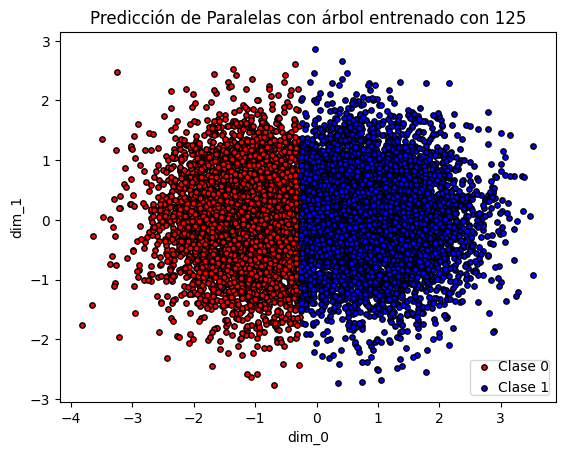

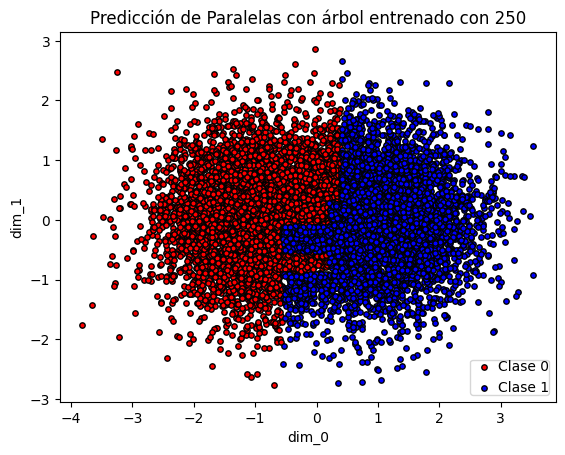

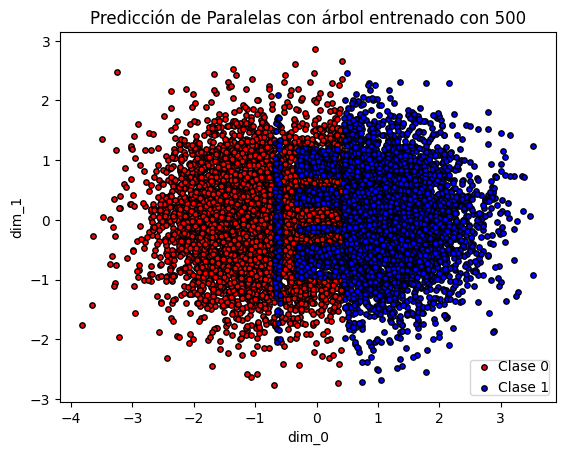

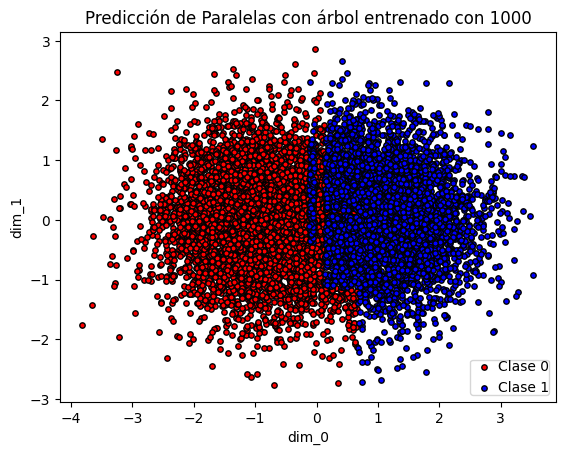

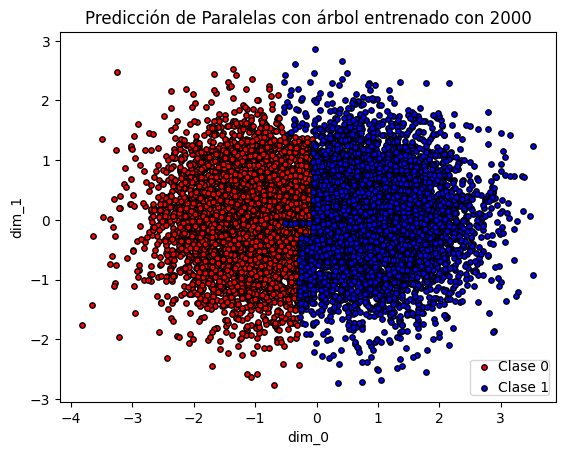

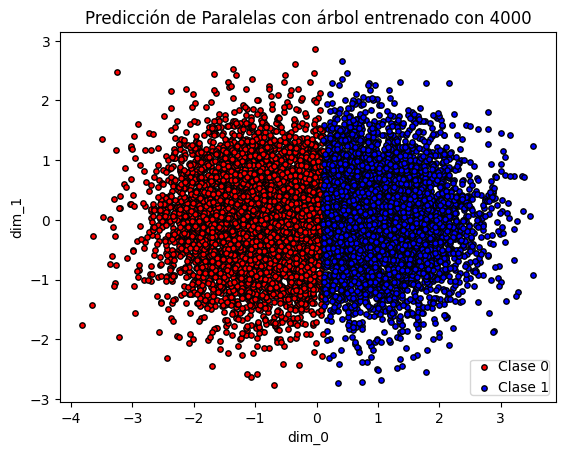

In [ ]:
for k, prediction in predictions.items():
  idx = np.where(prediction == 0)
  plt.scatter(
      test_data[idx, 0],
      test_data[idx, 1],
      c=['r'],
      label="Clase 0",
      cmap=plt.cm.RdYlBu,
      edgecolor="black",
      s=15,
  )

  idx = np.where(prediction == 1)
  plt.scatter(
      test_data[idx, 0],
      test_data[idx, 1],
      c=['b'],
      label="Clase 1",
      cmap=plt.cm.RdYlBu,
      edgecolor="black",
      s=15,
  )

  plt.xlabel(feature_names[0])
  plt.ylabel(feature_names[1])
  plt.legend(loc="lower right", borderpad=0, handletextpad=0)
  plt.title(f'Predicción de Paralelas con árbol entrenado con {k}')
  plt.show()

### Análisis de las gráficas


Podemos notar que los arboles entrenados con menos datos tenemos zonas con la primera dimension menor a 0 clasificados como clase 1 y viceversa. Nuevamente, esto es por overfitting.

Mientras mas datos utilizamos para el entrenamiento, en especial con 2000 y 4000 vertices, podemos notar que la frontera de decision se asemeja mucho a una recta vertical y=0. Nuevamente se puede intuir que el ruido es mitigado debido a una mayor presencia de puntos correctamente clasificados mas cerca de la media.

### Promedios

In [ ]:
paralelos_avgs = {}
for k, data in errors_paralelas.items():
  error_test_sum = 0
  error_training_sum = 0
  tree_size_sum = 0
  for d in data:
    error_test_sum += d['error_test']
    error_training_sum += d['error_train']
    tree_size_sum += d['tree_size']
  paralelos_avgs[k] = {'tree_size': tree_size_sum/len(data), 'error_train': error_training_sum/len(data), 'error_test': error_test_sum/len(data)}

## Análisis de promedios

### Generación de Gráficos

<ipython-input-28-438d080c7369>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-28-438d080c7369>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-28-438d080c7369>:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-28-438d080c7369>:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


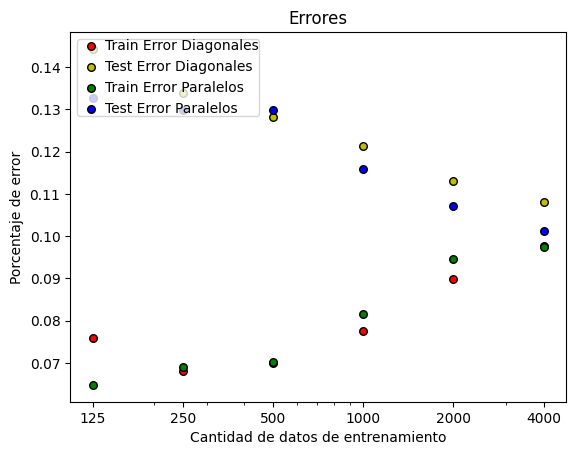

In [ ]:
error_train_diagonales_avgs = [d['error_train'] for k, d in diagonales_avgs.items()]
error_test_diagonales_avgs = [d['error_test'] for k, d in diagonales_avgs.items()]
error_train_paralelos_avg = [d['error_train'] for k, d in paralelos_avgs.items()]
error_test_paralelos_avg = [d['error_test'] for k, d in paralelos_avgs.items()]

plt.scatter(
    n_sizes,
    error_train_diagonales_avgs,
    c=['r'],
    label="Train Error Diagonales",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=30,
)

plt.scatter(
    n_sizes,
    error_test_diagonales_avgs,
    c=['y'],
    label="Test Error Diagonales",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=30,
)

plt.scatter(
    n_sizes,
    error_train_paralelos_avg,
    c=['g'],
    label="Train Error Paralelos",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=30,
)

plt.scatter(
    n_sizes,
    error_test_paralelos_avg,
    c=['b'],
    label="Test Error Paralelos",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=30,
)

plt.xscale('log')
plt.xticks(n_sizes, labels=[str(size) for size in n_sizes])

plt.xlabel('Cantidad de datos de entrenamiento')
plt.ylabel('Porcentaje de error')
plt.legend(loc="upper left", borderpad=0, handletextpad=0)
plt.title(f'Errores')
plt.show()

[16.2, 29.5, 55.3, 55.8, 25.4, 15.7]


<ipython-input-34-ddcb88549eda>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-34-ddcb88549eda>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


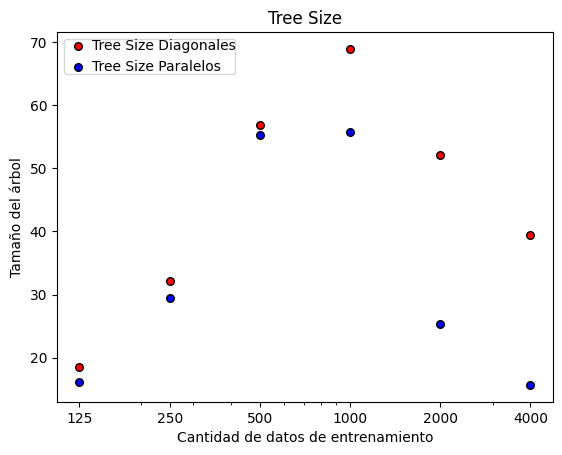

In [ ]:

tree_size_diagonales_avgs = [d['tree_size'] for k, d in diagonales_avgs.items()]
tree_size_paralelos_avgs = [d['tree_size'] for k, d in paralelos_avgs.items()]

print(tree_size_paralelos_avgs)

plt.scatter(
    n_sizes,
    tree_size_diagonales_avgs,
    c=['red'],
    label="Tree Size Diagonales",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=30,
)

plt.scatter(
    n_sizes,
    tree_size_paralelos_avgs,
    c=['blue'],
    label="Tree Size Paralelos",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=30,
)

plt.xscale('log')
plt.xticks(n_sizes, labels=[str(size) for size in n_sizes])

plt.xlabel('Cantidad de datos de entrenamiento')
plt.ylabel('Tamaño del árbol')
plt.legend(loc="upper left", borderpad=0, handletextpad=0)
plt.title(f'Tree Size')
plt.show()

### Analisis
Errores:

Podemos ver como al entrenar con mas elementos los errores en los conjuntos de entrenamiento suben mientras que en los de prueba bajan. Esto se debe al overfitting cuando menos elementos se utilizan para entrenar mencionado previamente.
 En el caso de paralelo los errores en test tienden a ser menor, esto es porque la frontera de menor error que es la recta vertical y=0 es mucho mas facil de representar que la diagonal y=-x que corresponde a la de diagonles, ya que esta ultima nunca podria ser reprensentada correctamente debido a que necesitariamos un arbol de tamaño infinito, mientras que la frontera y=0 es tan facil como tener un unico nodo donde todo valor de la primera dimension menor a 0 es clase 0 y todo mayor es clase 1. Todo esto hace que sea mas facil tener un error mas bajo para paralelas que para diagonales. Todo esto ocurre porque en un caso de 2 variables un árbol solo puede definir rectangulos como zonas para cada decisión.

 A lo que es error de training podemos ver un aumento para ambos problemas, a medida que se aumenta la cantidad de entrenamiento, esto es porque se reduce el overfitting a medida que más datos se utilizan para entrenar, siendo mejores generalizaciones.

 En ambos problemas, al usar el conjunto de 4000 puntos para entrenamiento vemos que el error de entrenamiento y el de testing estan muy cercanos, siendo entonces este un valor muy bueno de elementos para entrenar un modelo.

Tamaño del árbol:

A lo que tamaño del árbol respecta, para ambos problemas, con valores de entrenamiento de 500 y de 1000 tenemos árboles muy grandes, eso es generado por el overfitting. Al usar más datos para entrenar, se obtiene una mejor generalizacion y por lo tanto un árbol más chico, esto es particularmente notorio en el caso de las paralelas, por lo mencionado previamente sobre que el mejor árbol que se adapta al problema necesita un único nodo que divide por X en mayor o menor que 0. En el caso de las diagonales seguimos teniendo un árbol bastante grande ya que se necesita muchos nodos para aproximar la diagonal x=-y.

# Ejercicio 3

## Generación de datos y promedios de error

In [23]:
C_values = [0.5, 1.0, 1.5, 2.0, 2.5]
d = 5
n_training = 4000
n_testing = 10000
tree_count = 20

In [24]:
errors_paralelas = {}

for C in C_values:
  errors_list = []

  df_test = paralelas(n_testing, d, C)
  test_target = df_test["class"].to_numpy()
  test_data = df_test.drop(columns=["class"]).to_numpy()

  for i in range(tree_count):
    df_train = paralelas(n_training, d, C)
    train_target = df_train["class"].to_numpy()
    train_data = df_train.drop(columns=["class"]).to_numpy()

    t = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
    t.fit(train_data, train_target)

    predict_test = t.predict(test_data)
    accuracy_test = accuracy_score(test_target, predict_test)

    errors_list.append(1-accuracy_test)
  errors_paralelas[C] = errors_list

errors_paralelas_avg = []
for k, l in errors_paralelas.items():
  errors_paralelas_avg.append(sum(l)/tree_count)

In [25]:
errors_diagonales = {}

for C in C_values:
  errors_list = []

  df_test = diagonales(n_testing, d, C)
  test_target = df_test["class"].to_numpy()
  test_data = df_test.drop(columns=["class"]).to_numpy()

  for i in range(tree_count):
    df_train = diagonales(n_training, d, C)
    train_target = df_train["class"].to_numpy()
    train_data = df_train.drop(columns=["class"]).to_numpy()

    t = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
    t.fit(train_data, train_target)

    predict_test = t.predict(test_data)
    accuracy_test = accuracy_score(test_target, predict_test)

    errors_list.append(1-accuracy_test)
  errors_diagonales[C] = errors_list

errors_diagonales_avg = []
for k, l in errors_diagonales.items():
  errors_diagonales_avg.append(sum(l)/tree_count)

## 3.1 Mínimo error

Para predecir el mínimo error lo hice utilizando la distancia a las medias de cada clase en ambos problemas. Es decir que si un punto está más cerca de la media de la clase 0, lo clasificó como esta. Esto tiene sentido ya que es más probable que ese punto haya sido generado de esa clase en lugar de la otra debido a que ambas generaciones son con una distribución normal con la misma desviación estandar. Para estimar este error mejor hago 20 predicciones de conjuntos de 10 mil para cada problema y cálculo el promedio de los 20 conjuntos.

### Prediccion mas simple

In [9]:
def class_predict(dm0, dm1):
  if (dm0 < dm1):
      return 0
  else:
    if (dm1 < dm0):
      return 1
    else: # El caso donde la distancia son iguales
      return np.random.randint(2)

def predict_by_distance_diagonales (d, data):
  prediction = []
  m0 = [-1]*d
  m1 = [1]*d
  for x in data:
    dm0 = math.dist(x, m0)
    dm1 = math.dist(x, m1)
    prediction.append(class_predict(dm0, dm1))
  return prediction

def predict_by_distance_paralelas (d, data):
  prediction = []
  m0 = [-1] + [0]*(d-1)
  m1 = [1] + [0]*(d-1)
  for x in data:
    dm0 = math.dist(x, m0)
    dm1 = math.dist(x, m1)
    prediction.append(class_predict(dm0, dm1))
  return prediction

### Mínimo error diagonales

In [10]:
dim = 5
cant_sets = 20
minimun_errors_diagonales = []
for C in C_values:
  suma = 0
  for i in range(cant_sets):
    df = diagonales(10000, dim, C)
    target = df["class"].to_numpy()
    data = df.drop(columns=["class"]).to_numpy()

    prediction = predict_by_distance_diagonales(dim, data)
    accuracy = accuracy_score(target, prediction)
    suma += 1-accuracy

  minimun_errors_diagonales.append(suma/cant_sets)

print(minimun_errors_diagonales)

[0.022735000000000005, 0.158765, 0.2519699999999999, 0.306855, 0.34406500000000007]


### Mínimo error paralelas

In [11]:
dim = 5
cant_sets = 20
minimun_errors_paralelas = []
for C in C_values:
  suma = 0
  for i in range(cant_sets):
    df = paralelas(10000, dim, C)
    target = df["class"].to_numpy()
    data = df.drop(columns=["class"]).to_numpy()

    prediction = predict_by_distance_paralelas(dim, data)
    accuracy = accuracy_score(target, prediction)
    suma += 1-accuracy

  minimun_errors_paralelas.append(suma/cant_sets)

print(minimun_errors_paralelas)

[0.022640000000000004, 0.159765, 0.25272, 0.30796999999999997, 0.34282]


## Análisis

<ipython-input-26-a9ed6902f65e>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-26-a9ed6902f65e>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-26-a9ed6902f65e>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-26-a9ed6902f65e>:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


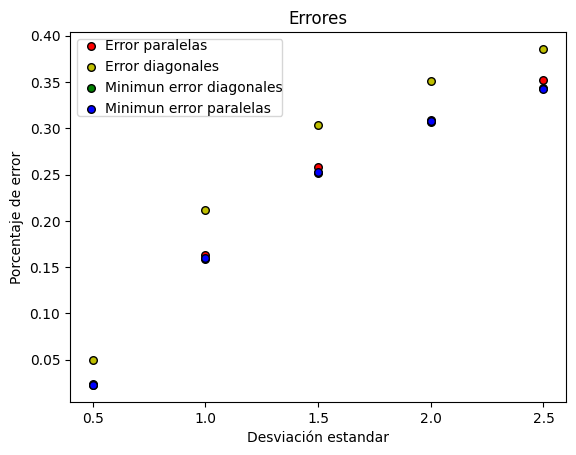

In [26]:
plt.scatter(
    C_values,
    errors_paralelas_avg,
    c=['r'],
    label="Error paralelas",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=30,
)

plt.scatter(
    C_values,
    errors_diagonales_avg,
    c=['y'],
    label="Error diagonales",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=30,
)

plt.scatter(
    C_values,
    minimun_errors_diagonales,
    c=['g'],
    label="Minimun error diagonales",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=30,
)

plt.scatter(
    C_values,
    minimun_errors_paralelas,
    c=['b'],
    label="Minimun error paralelas",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=30,
)

plt.xticks(C_values, labels=[str(v) for v in C_values])

plt.xlabel('Desviación estandar')
plt.ylabel('Porcentaje de error')
plt.legend(loc="upper left", borderpad=0, handletextpad=0)
plt.title(f'Errores')
plt.show()

El mínimo error es obvio que aumenta mientras mas subimos la desviación estandar, ya que esto a hacer que se generen puntos para cada clase mas lejos de la media, haciendo que se generen mas puntos en las zonas mas cercanas a la otra clase.

Los errores de los arboles en el caso del problema de diagonales podemos notar que sigue una curva muy parecida a la del error minimo, pero en todos los valores de C siempre se encuentra aproximadamente 10% mas arriba, esto es porque solo estamos entrenando los arboles con 250 puntos y ya vimos en el apartado 2 que esto genera overfitting, por lo que se aumenta el error sobre el caso de prueba. Si utilizamos un valor mas grande para el conjunto de entrenamiento, como 4000, podriamos ver que esta diferencia se reduce. Otra razon por la que nunca se alcanza el valor minimo es por lo ya mencionado sobre la dificultad de los arboles para aproximar diagonales cuando hablamos de 2 variables, supongo que en este caso sucede lo mismo al tratar de dividir el elemento 4-dimensional que divide el espacio creado por las 5 variables.

En el problema de paralelos, cuando la desviación estandar es 0.5 podemos ver que se tiene un arbol casi perfecto comparado al minimo error, esto se debe a que a pesar de utilizar pocos elementos para el entrenamiento, como el ruido es bajo, la efectividad es muy alta. Luego este valor sube pero como ya mencione se debe principalmente a los pocos elementos utilizados en el entrenamiento que causan overfitting. Si utilizaramos mas elementos para el entrenamiento, podriamos observar una mejora considerable en la predicción incluso cuando la desviación estandar es alta.

# Ejercicio 4

## Generacion de datos y promedios de error

In [ ]:
C = 0.78
n_training = 250
n_testing = 10000
d_values = [2, 4, 8, 16, 32]
tree_count = 20

In [ ]:
errors_diagonales = {}

for d in d_values:
  errors_list = []

  df_test = diagonales(n_testing, d, C)
  test_target = df_test["class"].to_numpy()
  test_data = df_test.drop(columns=["class"]).to_numpy()

  for i in range(tree_count):
    df_train = diagonales(n_training, d, C)
    train_target = df_train["class"].to_numpy()
    train_data = df_train.drop(columns=["class"]).to_numpy()

    t = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
    t.fit(train_data, train_target)

    predict_test = t.predict(test_data)
    accuracy_test = accuracy_score(test_target, predict_test)

    predict_train = t.predict(train_data)
    accuracy_train = accuracy_score(train_target, predict_train)

    errors_list.append({'error_test': 1-accuracy_test, 'error_train': 1-accuracy_train})

  errors_diagonales[d] = errors_list

errors_test_diagonales_avg = []
errors_train_diagonales_avg = []
for k, l in errors_diagonales.items():
  sum_train = 0
  sum_test = 0
  for e in l:
    sum_train += e['error_train']
    sum_test += e['error_test']
  errors_test_diagonales_avg.append(sum_test/tree_count)
  errors_train_diagonales_avg.append(sum_train/tree_count)

In [ ]:
errors_paralelas = {}

for d in d_values:
  errors_list = []

  df_test = paralelas(n_testing, d, C)
  test_target = df_test["class"].to_numpy()
  test_data = df_test.drop(columns=["class"]).to_numpy()

  for i in range(tree_count):
    df_train = paralelas(n_training, d, C)
    train_target = df_train["class"].to_numpy()
    train_data = df_train.drop(columns=["class"]).to_numpy()

    t = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
    t.fit(train_data, train_target)

    predict_test = t.predict(test_data)
    accuracy_test = accuracy_score(test_target, predict_test)

    predict_train = t.predict(train_data)
    accuracy_train = accuracy_score(train_target, predict_train)

    errors_list.append({'error_test': 1-accuracy_test, 'error_train': 1-accuracy_train})
  errors_paralelas[d] = errors_list

errors_test_paralelas_avg = []
errors_train_paralelas_avg = []
for k, l in errors_paralelas.items():
  sum_train = 0
  sum_test = 0
  for e in l:
    sum_train += e['error_train']
    sum_test += e['error_test']
  errors_test_paralelas_avg.append(sum_test/tree_count)
  errors_train_paralelas_avg.append(sum_train/tree_count)

## Análisis

<ipython-input-97-8f1e2f27ceb0>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-97-8f1e2f27ceb0>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-97-8f1e2f27ceb0>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-97-8f1e2f27ceb0>:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


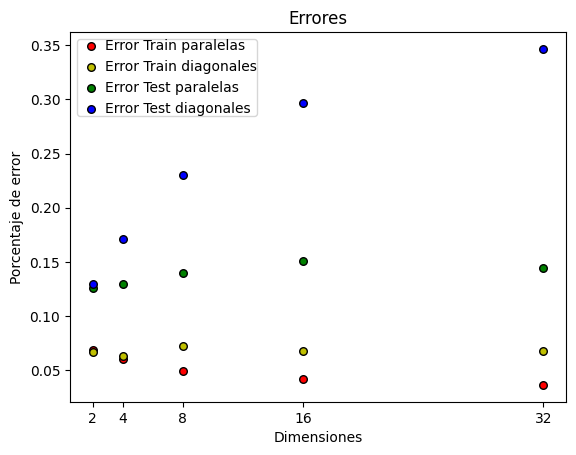

In [ ]:
plt.scatter(
    d_values,
    errors_train_paralelas_avg,
    c=['r'],
    label="Error Train paralelas",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=30,
)

plt.scatter(
    d_values,
    errors_train_diagonales_avg,
    c=['y'],
    label="Error Train diagonales",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=30,
)

plt.scatter(
    d_values,
    errors_test_paralelas_avg,
    c=['g'],
    label="Error Test paralelas",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=30,
)

plt.scatter(
    d_values,
    errors_test_diagonales_avg,
    c=['b'],
    label="Error Test diagonales",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=30,
)

plt.xticks(d_values, labels=[str(v) for v in d_values])

plt.xlabel('Dimensiones')
plt.ylabel('Porcentaje de error')
plt.legend(loc="upper left", borderpad=0, handletextpad=0)
plt.title(f'Errores')
plt.show()

ANALISIS

# Ejercicio 5

## Carga de datos y gráfica

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Materias/Colab Notebooks/IAA/TP1/xor.csv', header=None, names=['x', 'y', 'class'])

<ipython-input-78-9029a8fecb79>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-78-9029a8fecb79>:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


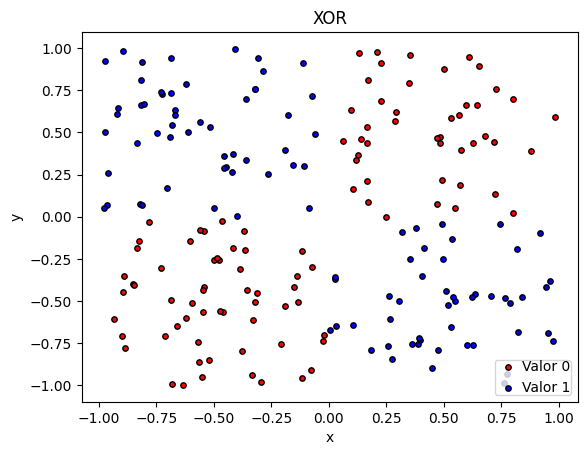

In [ ]:
target = df["class"].to_numpy()
feature_names = list(df.columns.values)[:-1]
target_names= list(set(df["class"].values.tolist()))
data = df.drop(columns=["class"]).to_numpy()

idx = np.where(target == 0)
plt.scatter(
    data[idx, 0],
    data[idx, 1],
    c=['r'],
    label="Valor 0",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=15,
)

idx = np.where(target == 1)
plt.scatter(
    data[idx, 0],
    data[idx, 1],
    c=['b'],
    label="Valor 1",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=15,
)

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.title(f'XOR')
plt.show()

## Posible mejor árbol

El árbol mas simple que podriamos obtener sería el que tenga el comportamiento del siguiente if:


```
if x <= 0:
  if y <= 0:  # Caso x < 0 e y < 0
    return 0
  else:       # Caso x < 0 e y > 0
    return 1
else:
  if y <= 0:  # Caso x > 0 e y < 0
    return 1
  else:       # Caso x > 0 e y > 0
    return 0
```

Es decir, un arbol donde primero de compare por X y luego por Y (o viceversa) y el primer nodo nos divida según si X es positivo o si es negativo y luego en cada rama haga lo mismo con Y, si X e Y son positivos o ambos son negativos, el XOR devuelve 0. En los otros casos donde uno es positivo y el otro negativo, el XOR devuelve 1.

## Entrenamiento del árbol

[Text(0.5, 0.5, 'entropy = 1.0\nsamples = 200\nvalue = [100, 100]')]

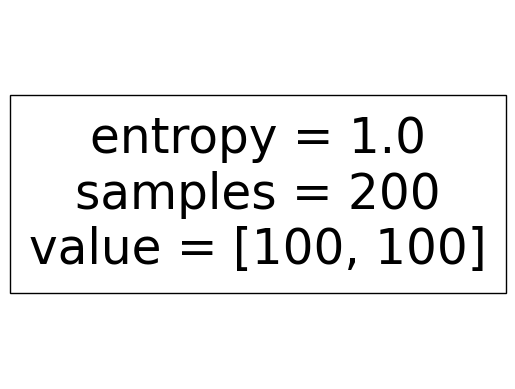

In [ ]:
from sklearn import tree
t = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5)
t.fit(data, target)
tree.plot_tree(t)

<ipython-input-80-38edfdd4b3cd>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-80-38edfdd4b3cd>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


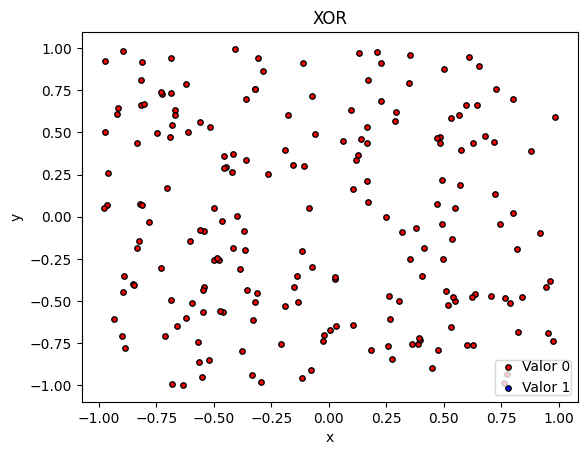

In [ ]:
prediction = t.predict(data)
idx = np.where(prediction == 0)
plt.scatter(
    data[idx, 0],
    data[idx, 1],
    c=['r'],
    label="Valor 0",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=15,
)

idx = np.where(prediction == 1)
plt.scatter(
    data[idx, 0],
    data[idx, 1],
    c=['b'],
    label="Valor 1",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=15,
)

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.title(f'XOR')
plt.show()

## Análisis


Podemos ver que el árbol generado tiene un único nodo, haciendo que la predicción de los datos sean de un único tipo.

Esto esta sucediendo porque el parámetro min_impurity_decrease esta en 0.03, esto lo que hace es que al momento de dividir un nodo lo hace solo si la impureza de los nuevos nodos que genere se haya reducido al menos el valor configurado, esto se hace para evitar sobreentrenamiento previniendo que se sigan haciendo mas divisiones donde no se gana nada.

En esta situacion en particular lo que esta pasando es que cuando se quiere dividir por X (o por Y), al tomar por ejemplo los valores de X menores a 0 por un lado y los mayores por otro, las impurezas de estos 2 conjuntos va a seguir siendo alta ya que los puntos estan bien distribuidos, por lo que la cantidad de elementos que tenemos de una clase y de otra van a seguir siendo muy parecidas en ambos conjuntos, haciendo que la reduccion de impureza sea chica, por lo que el algoritmo decide no seguir dividiendo.


Para ver un ejemplo de esto, podriamos hacer un analisis de impureza en el caso donde dividieramos por X en mayor y menor que 0:


In [ ]:
posX_negY = 0
posX_posY = 0
negX_posY = 0
negX_negY = 0

for d in data:
  if d[0] <= 0:
    if d[1] <= 0:  # Caso x < 0 e y < 0
      negX_negY += 1
    else:       # Caso x < 0 e y > 0
      negX_posY += 1
  else:
    if d[1] <= 0:  # Caso x > 0 e y < 0
      posX_negY += 1
    else:       # Caso x > 0 e y > 0
      posX_posY += 1

print(f'x>0, y<0: {posX_negY}')
print(f'x>0, y>0: {posX_posY}')
print(f'x<0, y>0: {negX_posY}')
print(f'x<0, y<0: {negX_negY}')

x>0, y<0: 48
x>0, y>0: 44
x<0, y>0: 52
x<0, y<0: 56


La formula para esto es

(N_t / N) * (impurity - (N_t_R / N_t) * right_impurity - (N_t_L / N_t) * left_impurity)

tenemos los siguientes valores:
```
N_t = 200
N = 200
N_t_L = 108
N_t_R = 92
impurity = 0.5
right_impurity = 0.5217
left_impurity = 0.5185
```
donde N es la cantidad de samples, N_t es la cantidad de samples en el nodo actual (que al ser el primero es N), N_t_L es la cantidad de samples en el hijo izquierdo, y N_t_R es la cantiad de samples en el hijo derecho.



Reemplazando en la formula tenemos:
```
(200 / 200) * (0.5 - (92 / 200) * 0.5217 - (108 / 200) * 0.5185)=
0.5 - 0.24 - 0.26=
0
```
Podemos ver que la impureza no se reduce lo suficiente, por lo que el algoritmo decide no dividir. Esto tambien se da en el caso de que queramos dividir por Y o por otro valor, por lo que solo tenemos un único nodo.


